# Création du tableau individu variables pour protocole 2

In [64]:
import pandas as pd
import numpy as np
from bidict import frozenbidict

In [98]:

df = pd.read_csv("Clean_Dataset_output_clients_menages_tabular.csv")

#df = pd.read_csv("Clean_Dataset_output_clients_menages_tabular_v2.csv",  na_values='-1')
df.describe()

,age_std_x,cnc_tem_al_20180228,cnc_tem_al_20180430,cnc_tem_al_20180630,cnc_tem_al_20180831,cnc_tem_al_20181031,cnc_tem_al_20181231,cnc_tem_al_20190228,cnc_tem_al_20190430,cnc_tem_al_20190630,...,solde_std_20190331,solde_std_20190430,solde_std_20190531,solde_std_20190630,solde_std_20190731,solde_std_20190831,solde_std_20190930,cnc_tem_apl,cnc_tem_sls,mnt_caution_dg_ccl_std
count,19970.000000,6829.0,6855.0,6888.0,6894.0,6899.0,17726.0,8040.0,8015.0,8039.0,...,8008.000000,8015.000000,8031.000000,8039.000000,8040.000000,8040.000000,19577.000000,19970.000000,19970.000000,19970.000000
mean,49.571858,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,202.475850,193.429790,185.796230,173.870128,153.778762,183.167832,97.355993,0.489227,0.030425,8.865650
std,15.806576,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,880.170274,935.297258,967.517935,923.682147,926.788163,953.403434,729.394231,0.488569,0.159957,52.098992
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-3505.500000,-3978.840000,-6665.570000,-6661.050000,-6661.670000,-6662.290000,-6662.910000,0.000000,0.000000,-428.640000
25%,37.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,48.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000
75%,60.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,128.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,17725.830000,19042.230000,20567.550000,21164.180000,16065.250000,13019.250000,14764.660000,1.000000,1.000000,1053.840000


### Remove columns with to many NaNs

suppression des colonnes avec NaN dans les soldes

In [99]:
solde_cols = lambda df: [c for c in df.columns if 'solde_std' in c]
df.dropna(
    axis=0,
    thresh=5,
    subset=solde_cols(df),
    inplace=True
)
len(df)

8225

In [100]:
df['nan_solde_count'] = df[[c for c in df.columns if 'solde_std' in c]].isna().sum(axis=1)
len(df[df['nan_solde_count']>=19])

0

In [101]:
import missingno as msno

<AxesSubplot:>

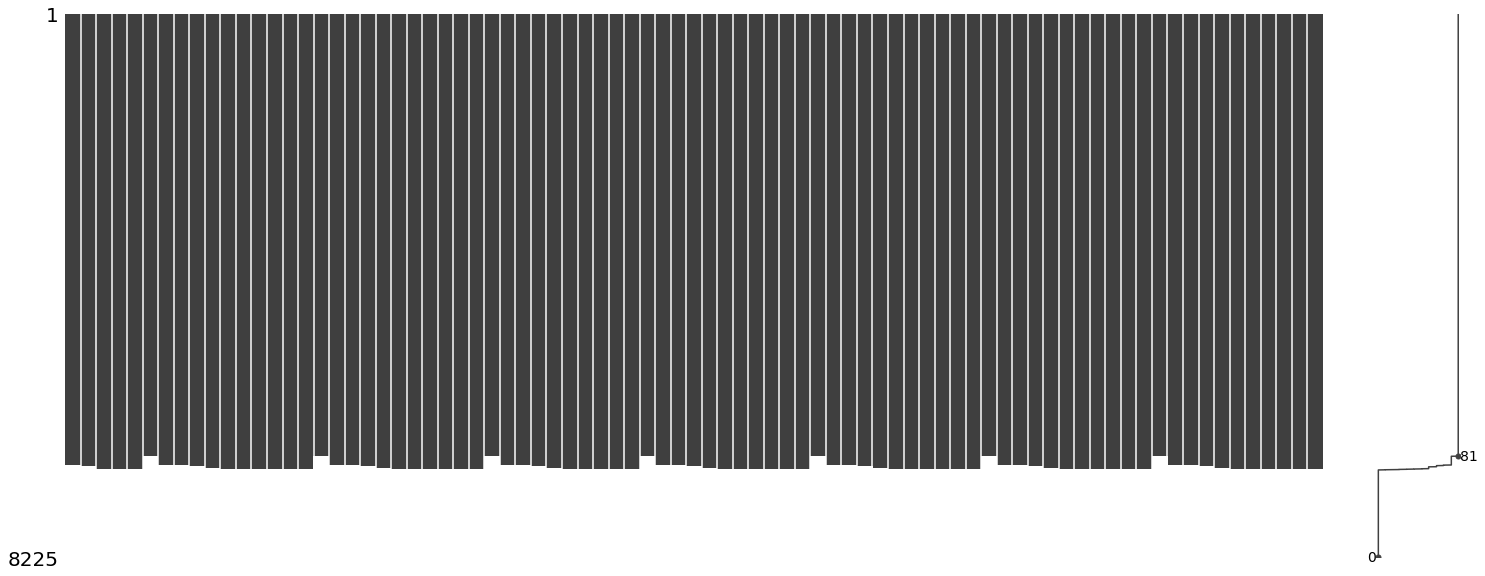

In [102]:
na_sum = df.isna().sum()
msno.matrix(df[na_sum[(na_sum>1000)].index])

In [103]:
import seaborn as sb
import matplotlib.pyplot as plt

In [104]:
sum_nan = df.isna().sum()
max_sum = max(sum_nan.values)
col_with_data = [c for c in df.columns if sum_nan[c]/len(df) < .93]
df = df[col_with_data]

### attention pour certaines colonnes les -1 ne sont pas des NaNs
uniquement dans le dataset de Min

In [105]:
#df[solde_cols(df)] = df[solde_cols(df)].fillna(-1)

On peut donc étudier environ 8226 individus.
### On ajoute un id pour l'individu qui va permettre de faire des jointure plus tard

In [106]:
individu_id = list(range(len(df)))
df['individu_id'] = individu_id
df.head()

,age_std_x,cnc_dteff,cnc_tem_al_20180228,cnc_tem_al_20180430,cnc_tem_al_20180630,cnc_tem_al_20180831,cnc_tem_al_20181031,cnc_tem_al_20181231,cnc_tem_al_20190228,cnc_tem_al_20190430,...,type_revenu_lib_20181231,type_revenu_lib_20190930,type_trf_lib,cnc_tem_apl,cnc_tem_sls,mnt_caution_dg_ccl_std,cnc_dtdval,cnc_dtfval,nan_solde_count,individu_id
0,50.0,2011-04-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,All. Chomage_IndemnitÃ©s,All. Chomage_IndemnitÃ©s,Relocation,0.0,0.000000,0.0,2018-01-31,2100-01-01,0,0
1,31.0,2015-01-27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Non RenseignÃ©,Non RenseignÃ©,Relocation,0.0,0.000000,0.0,2018-01-31,2100-01-01,0,1
2,75.0,1991-09-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Non RenseignÃ©,Non RenseignÃ©,Relocation,0.0,0.000000,0.0,2018-01-31,2100-01-01,0,2
3,59.0,1986-03-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Autre (hors APL ou AL),Autre (hors APL ou AL),Relocation,0.0,0.571429,0.0,2018-01-31,2100-01-01,0,3
4,61.0,1989-09-15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Non RenseignÃ©,Non RenseignÃ©,Relocation,0.0,0.000000,0.0,2018-01-31,2100-01-01,0,4


## Conversion des colonnes

**On converti les dates dans le nom des colonnes pour des nombres replésentant l'écart au mois 0**
* Les colonnes finissant par 0 correspondent au présent.
* les colonnes finissant par un nombre positif, représentent l'écart avec le mois futurs
* les colonnes finissants par un nombre négatif représentent les mois précédants.

In [107]:
has_date = lambda s: len(s)>8 and all([l.isdigit() for l in s[-8:]])
not_has_date = lambda s: not has_date(s)

print(has_date("age_std_x"))
date_columns = filter(has_date, df.columns)
date_str = sorted(set([date[-8:] for date in date_columns]))
num_date = frozenbidict({num: date for num, date in zip(range(len(date_str)), date_str)})
num_date

False


frozenbidict({0: '20180131', 1: '20180228', 2: '20180331', 3: '20180430', 4: '20180531', 5: '20180630', 6: '20180731', 7: '20180831', 8: '20180930', 9: '20181031', 10: '20181130', 11: '20181231', 12: '20190131', 13: '20190228', 14: '20190331', 15: '20190430', 16: '20190531', 17: '20190630', 18: '20190731', 19: '20190831', 20: '20190930'})

## On veut renommer les variables qui changes annuelement

On renomme 'type_revenu_lib' pour indiquer que c'est une variable qui change annualement plutot que mensuellement

In [108]:
from collections import Counter

In [109]:
date_cols = {}
for date in num_date.values():
    date_cols[date] = {c for c in df.columns if date in c}
    
cols_count = Counter()
for cs in date_cols.values():
    cols_count += {'_'.join(c.split("_")[:-1]):1 for c in cs}
cols_count

Counter({'mnt_aides_ccl_std': 21,
         'mnt_sls_ccl_std': 21,
         'solde_std': 21,
         'mnt_ttc_echeance_std': 21,
         'mnt_total_encaisse_std': 21,
         'mnt_solde_charges_ccl_std': 20,
         'mnt_ttc_facture_ccl_std': 21,
         'cnc_tem_al': 11,
         'nb_menage_autre_std': 2,
         'nb_pacse_std': 2,
         'nb_concubin_std': 2,
         'nb_couple_ss_enf_std': 2,
         'nb_celibataire_std': 2,
         'nb_seul_std': 2,
         'nb_veuf_std': 2,
         'nb_couple_av_enf_std': 2,
         'type_revenu_lib': 2,
         'nb_sls_std': 2,
         'nb_marie_std': 2,
         'mnt_revenu_imp_n_std': 2,
         'nb_monoparental_std': 2,
         'nb_divorce_std': 2,
         'nbr_enfant_std': 2,
         'nbr_occupant_menage_std': 2,
         'nb_separe_std': 2,
         'mnt_ressource_mensuel_std': 2,
         'mnt_plafond_plus_std': 1})

In [110]:
for col, count in cols_count.items():
    if count<=2:
        df.rename(
            columns={
                c: c[:-4] for c in df.columns if col in c 
            },
            inplace=True
        )

In [111]:
def get_renamed_dated_cols_to_number_relativ(df: pd.DataFrame, num_date: dict, num: int) -> pd.DataFrame:
    date_columns = list(filter(has_date, df.columns))
    df_rel = df[date_columns+['individu_id']].copy()
    for date_column in date_columns:
        df_rel.rename(
            columns={
                date_column: f'{date_column[:-8]}{int(num_date.inverse[date_column[-8:]]) - num}'},
            inplace=True
        )
        
    return df_rel

df_rel = get_renamed_dated_cols_to_number_relativ(df, num_date, 2)
print(df_rel.columns)

Index(['cnc_tem_al_-1', 'cnc_tem_al_1', 'cnc_tem_al_3', 'cnc_tem_al_5',
       'cnc_tem_al_7', 'cnc_tem_al_9', 'cnc_tem_al_11', 'cnc_tem_al_13',
       'cnc_tem_al_15', 'cnc_tem_al_17',
       ...
       'solde_std_10', 'solde_std_11', 'solde_std_12', 'solde_std_13',
       'solde_std_14', 'solde_std_15', 'solde_std_16', 'solde_std_17',
       'solde_std_18', 'individu_id'],
      dtype='object', length=158)


In [112]:
df_base = df[filter(not_has_date, df.columns)]
df_base_rels = [0]*len(num_date)
for i in num_date:
    df_rel = get_renamed_dated_cols_to_number_relativ(df, num_date, i)
    df_base_rels[i] = pd.merge(
        left=df_base, 
        right=df_rel,
        on="individu_id",
        suffixes=('','_y')
    )
    df_base_rels[i].drop(df_base_rels[i].filter(regex='_y$').columns.tolist(),axis=1, inplace=True)
df_base_rels[0]

,age_std_x,cnc_dteff,cond_loc_lib,elo_categ_financement_inii,elo_dtf_construction,elo_etage,elo_mode_chauffage,geo_cp,geo_localite,geo_region_lib,...,solde_std_11,solde_std_12,solde_std_13,solde_std_14,solde_std_15,solde_std_16,solde_std_17,solde_std_18,solde_std_19,solde_std_20
0,50.0,2011-04-01,Non RenseignÃ©,PLC,2006-03-01,Rez Chauss,-1,-1,Non RenseignÃ©,Non RenseignÃ©,...,-2.78,-3.93,0.97,5.87,10.77,-4.33,-19.43,-34.53,-112.29,-127.39
1,31.0,2015-01-27,Non RenseignÃ©,PLC,2006-03-01,1Â° Ã©tage,-1,-1,Non RenseignÃ©,Non RenseignÃ©,...,0.00,709.41,0.02,404.64,850.29,606.95,606.95,0.02,-58.49,-58.49
2,75.0,1991-09-01,Non RenseignÃ©,PLA,1953-01-01,1Â° Ã©tage,-1,62990,ROYON,NORD-PAS-DE-CALAIS,...,-43.22,50.00,50.00,496.20,744.30,992.40,0.00,0.00,0.00,-193.73
3,59.0,1986-03-01,Non RenseignÃ©,PLA,1953-01-01,Rez Chauss,-1,62990,ROYON,NORD-PAS-DE-CALAIS,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-169.37
4,61.0,1989-09-15,Non RenseignÃ©,HLM,1966-01-01,1Â° Ã©tage,-1,-1,Non RenseignÃ©,Non RenseignÃ©,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-11.94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8220,27.0,2013-10-30,Non RenseignÃ©,-1,2013-10-30,Rez chauss,Individuel gaz,63160,EGLISENEUVE-PRES-BILLOM,AUVERGNE,...,NaN,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
8221,40.0,2015-12-14,Non RenseignÃ©,-1,2015-12-14,Rez jardin,chauffage individuel gaz,89330,PIFFONDS,BOURGOGNE,...,NaN,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
8222,46.0,2007-12-16,Non RenseignÃ©,-1,1976-01-01,Rez Chauss,-1,55140,BUREY-LA-COTE,LORRAINE,...,NaN,NaN,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
8223,61.0,1999-11-15,Non RenseignÃ©,-1,1993-08-01,Rez Chauss,-1,31450,NOUEILLES,MIDI-PYRENEES,...,NaN,NaN,255.92,127.97,0.00,0.00,0.00,-0.12,0.00,0.00


In [113]:
df_base_rels[0]["solde_std_0"].isna().sum()

1530

In [114]:
 # here restriction by slice 3 because my computer crashes 
df_base_rel = pd.concat(df_base_rels[:])

In [115]:
#sorted(df_base_rel.columns.values)
print(df_base_rel.shape)
#df_base_rel["solde_std_2"].isna().sum()

(172725, 385)


Par example les colonnes solde:
'solde_std_-1',
 'solde_std_-10',
 'solde_std_-11',
 'solde_std_-12',
 'solde_std_-13',
 'solde_std_-14',
 'solde_std_-15',
 'solde_std_-16',
 'solde_std_-17',
 'solde_std_-18',
 'solde_std_-19',
 'solde_std_-2',
 'solde_std_-20',
 'solde_std_-3',
 'solde_std_-4',
 'solde_std_-5',
 'solde_std_-6',
 'solde_std_-7',
 'solde_std_-8',
 'solde_std_-9',
 'solde_std_0',
 'solde_std_1',
 'solde_std_10',
 'solde_std_11',
 'solde_std_12',
 'solde_std_13',
 'solde_std_14',
 'solde_std_15',
 'solde_std_16',
 'solde_std_17',
 'solde_std_18',
 'solde_std_19',
 'solde_std_2',
 'solde_std_20',
 'solde_std_3',
 'solde_std_4',
 'solde_std_5',
 'solde_std_6',
 'solde_std_7',
 'solde_std_8',
 'solde_std_9',
 
 On peut utiliser les colonnes avec des mois négatifs comme des features. 
 
 Les colonnes positives sont des colonnes utilisées comme target.
 
 les colonnes avec 0 doivent être considéré comme le mois présent

### selection d'une ligne par individu

In [116]:
#df_base_rel.drop_duplicates("individu_id", inplace=True)

### remove cols with to many Nans before saving to csv

Text(0, 0.5, '# of columns whare the Nans proportion < l')

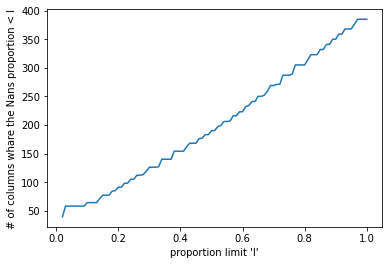

In [117]:
sum_nan = df_base_rel.isna().sum()
fig, ax = plt.subplots()
ax.plot(
    np.arange(2,101)/100, 
    [len([c for c in df_base_rel.columns if sum_nan[c]/len(df_base_rel) < limit/100]) for limit in range(2,101)]
)
ax.set_xlabel("proportion limit 'l'")
ax.set_ylabel("# of columns whare the Nans proportion < l")

In [118]:
col_with_data = [c for c in df_base_rel.columns if sum_nan[c]/len(df_base_rel) < 1]
df_base_rel[col_with_data].shape

(172725, 385)

In [119]:
df_base_rel_with_data = df_base_rel[col_with_data]

### Remplacer les valeurs manquantes par des Nans

In [120]:
df_base_rel_with_data = df_base_rel_with_data.replace("Non RenseignÃ©",np.nan)

In [121]:
non_numerical = df_base_rel_with_data.select_dtypes(exclude=np.number).columns.tolist()

In [122]:
df_base_rel_with_data[non_numerical] = df_base_rel_with_data[non_numerical].replace('-1', np.nan)

In [123]:
sum_nan = df_base_rel_with_data.isna().sum()
non_numerical_with_data = [c for c in df_base_rel_with_data.columns if sum_nan[c]/len(df_base_rel_with_data) < .933]
df_base_rel_with_data = df_base_rel_with_data[non_numerical_with_data]

Let's remove rows where there is no data in the future

In [124]:
future_cols = [c for c in df_base_rel_with_data if c.split('_')[-1].isdigit() and 21>int(c.split('_')[-1])>0]

In [125]:
df_base_rel_with_data = df_base_rel_with_data.dropna(
    axis=0,
    thresh=1,
    subset=future_cols,
)
len(df_base_rel_with_data)

163066

Let's remove rows where there is no data in the past

In [126]:
past_cols = [c for c in df_base_rel_with_data if c.split('_')[-1][0] in ('-','0')]

In [127]:
df_base_rel_with_data = df_base_rel_with_data.dropna(
    axis=0,
    thresh=1,
    subset=past_cols,
)
len(df_base_rel_with_data)

147934

<AxesSubplot:>

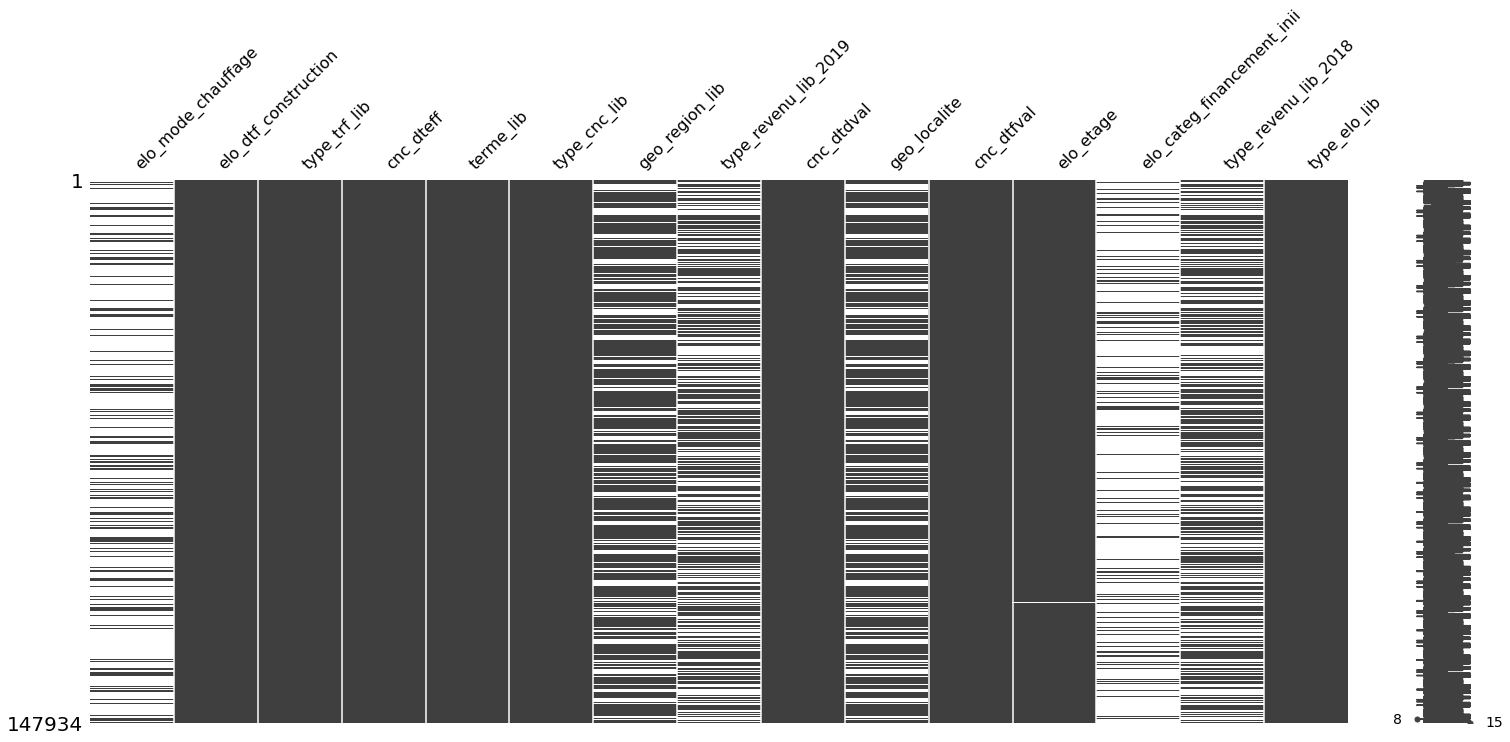

In [128]:
non_numerical = set(non_numerical)&set(df_base_rel_with_data.columns.values)
msno.matrix(df_base_rel_with_data[non_numerical])

### merge some columns to save space

In [129]:
def get_str_num(s):
    n = s.split('_')[-1]
    if n[-1].isdigit():
        return int(n)
    
def get_feature_and_months_col(columns: list, m_min: int, m_max: int, target: str=None)->list:
    assert m_min <= m_max, 'the first month should be smaller than the last'
    if target:
        features = [c for c in columns if c==target or get_str_num(c)!=None and m_min<=get_str_num(c)<=m_max ]
    else:
        features = [c for c in columns if get_str_num(c)!=None and m_min<=get_str_num(c)<=m_max ]
    return features

In [130]:
history_cols = get_feature_and_months_col(df_base_rel_with_data, -2, 0)

<AxesSubplot:>

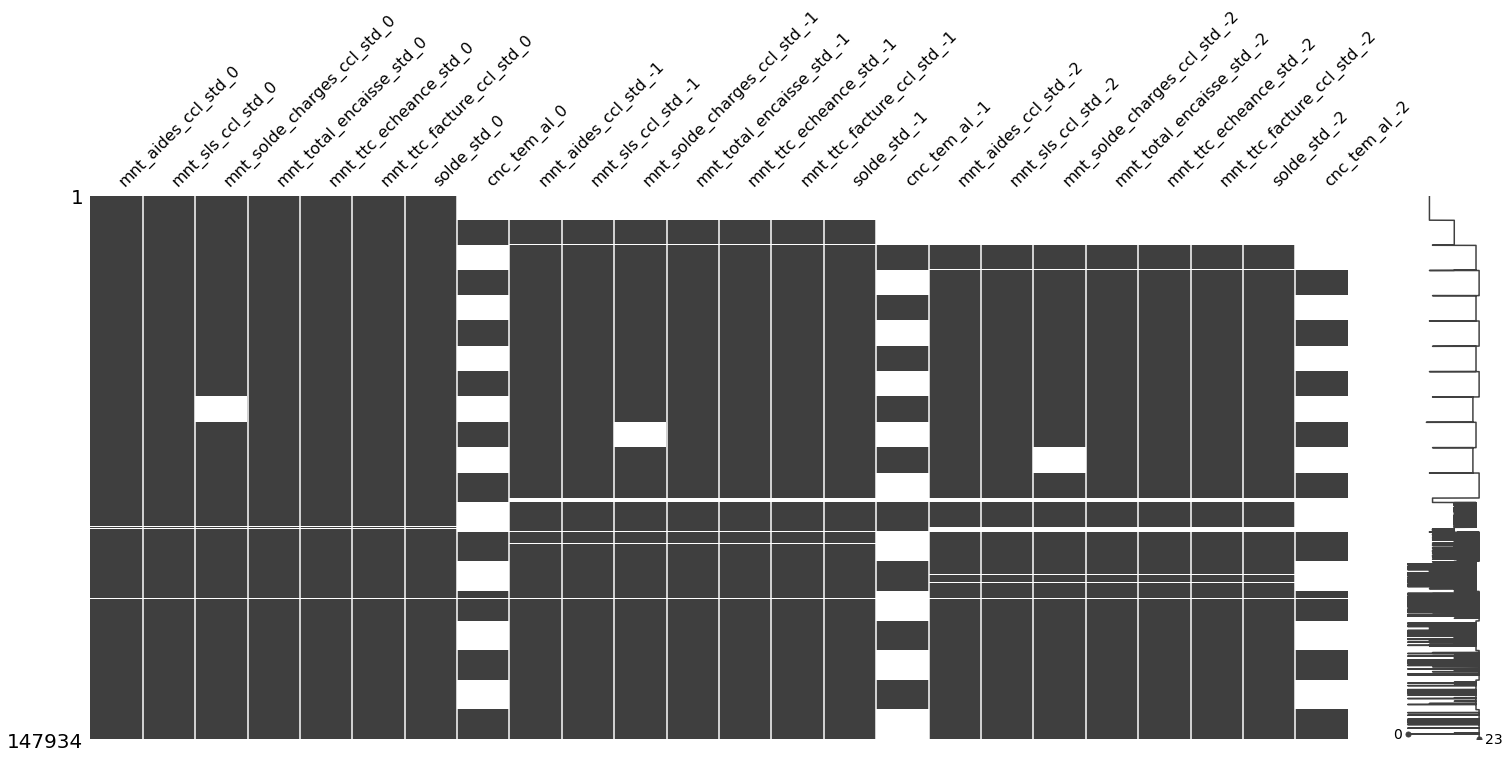

In [131]:
msno.matrix(df_base_rel_with_data[history_cols])

### il faut fusionner les cnc_tem_al tout les deux mois

In [138]:
for m in range(-20, 20, 2):
    if  all(c in df_base_rel_with_data.columns for c in [f'cnc_tem_al_{m}',f'cnc_tem_al_{m-1}']):
        df_base_rel_with_data[f'cnc_tem_al_{m}'].fillna(
            value=df_base_rel_with_data[f'cnc_tem_al_{m-1}'],
            inplace=True
        )
        df_base_rel_with_data.drop(
            columns=f'cnc_tem_al_{m-1}',
            inplace=True
        )

<AxesSubplot:>

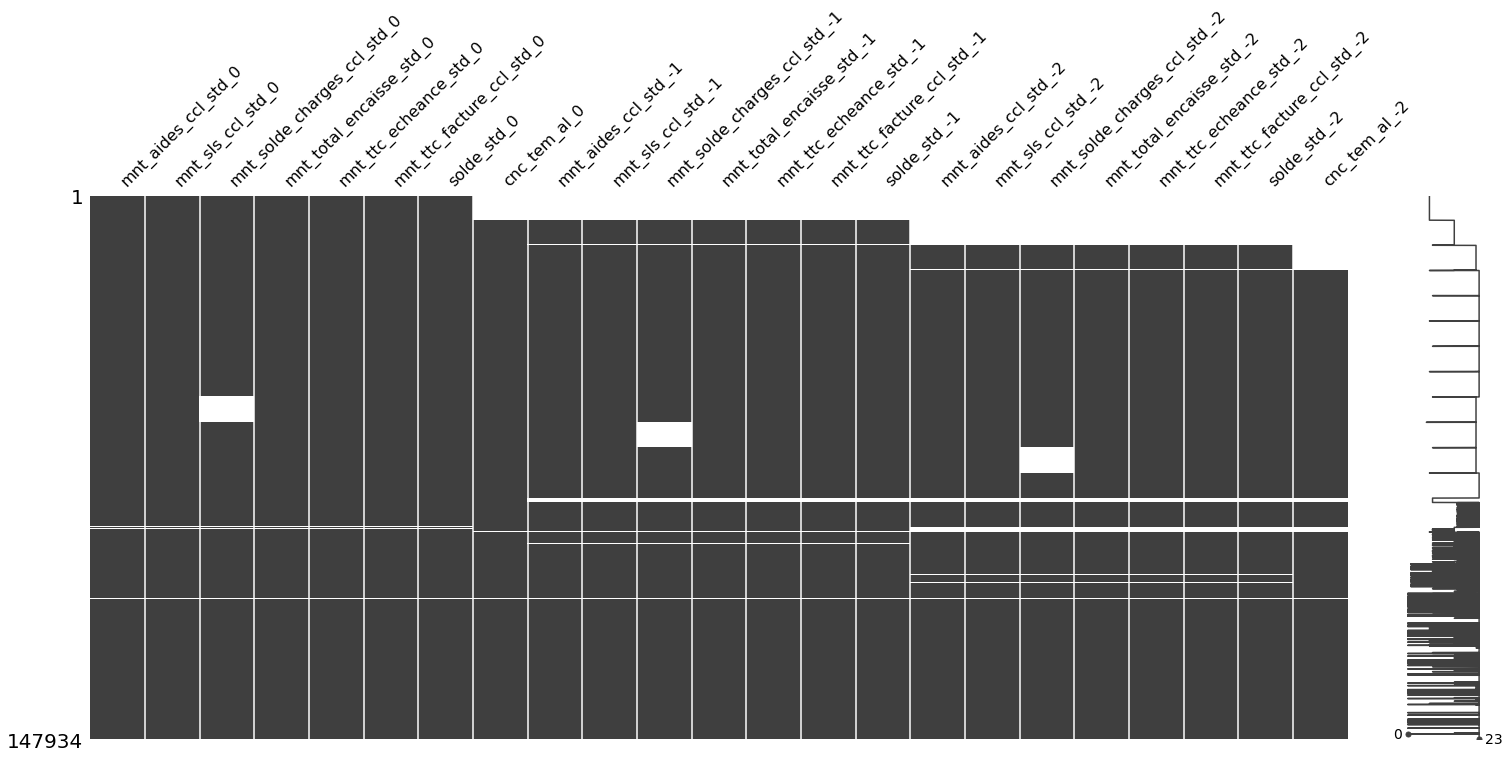

In [140]:
history_cols = get_feature_and_months_col(df_base_rel_with_data, -2, 0)
msno.matrix(df_base_rel_with_data[history_cols])

## generate csv

In [141]:
df_base_rel_with_data.to_csv("df_protocole_2_lessNans.csv")